In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/kentbaluyot/Desktop/Labor Force Survey/LFS_march2324_final.csv")
df

,Region,C10-Job Indicator,"C11 - Location of Work (Province, Municipality)",C15-Major Industry Group,C16-Nature of Employment (Primary Occupation)
0,1,1,2805,1,1
1,1,2,0,0,0
2,1,2,0,0,0
3,1,2,0,0,0
4,1,1,2805,1,1
...,...,...,...,...,...
394488,19,1,4712,47,0
394489,19,2,0,0,0
394490,19,2,0,0,0
394491,19,2,0,0,0


In [3]:
df.dtypes

Region                                             int64
C10-Job Indicator                                  int64
C11 - Location of Work (Province, Municipality)    int64
C15-Major Industry Group                           int64
C16-Nature of Employment (Primary Occupation)      int64
dtype: object

In [4]:
region_mapping = {
    13: 'National Capital Region (NCR)',
    14: 'Cordillera Administrative Region (CAR)', 
    1: 'Region I (Ilocos Region)',
    2: 'Region II (Cagayan Valley)',
    3: 'Region III (Central Luzon)',
    4: 'Region IV-A (CALABARZON)',
    17: 'MIMAROPA Region',
    5: 'Region V (Bicol Region)',
    6: 'Region VI (Western Visayas)',
    7: 'Region VII (Central Visayas)',
    8: 'Region VIII (Eastern Visayas)',
    9: 'Region IX (Zamboanga Peninsula)',
    10: 'Region X (Northern Mindanao)',
    11: 'Region XI (Davao Region)',
    12: 'Region XII (SOCCSKSARGEN)',
    16: 'Region XIII (Caraga)',
    19: 'Autonomous Region in Muslim Mindanao (ARMM)'
}

# Map region codes to names
df['Region_Name'] = df['Region'].astype(int).map(region_mapping)

# Map job indicator to employment status
df['Employment_Status'] = df['C10-Job Indicator'].astype(int).map({
    1: 'Employed',
    2: 'Unemployed'
})

In [5]:
#Calculate employment statistics by region
employment_stats = df.groupby(['Region_Name', 'Employment_Status']).size().unstack(fill_value=0)
employment_stats['Total'] = employment_stats.sum(axis=1)
employment_stats['Employment_Rate'] = (employment_stats['Employed'] / employment_stats['Total'] * 100).round(2)
employment_stats['Unemployment_Rate'] = (employment_stats['Unemployed'] / employment_stats['Total'] * 100).round(2)

# Sort by total population for better visualization
employment_stats = employment_stats.sort_values('Total', ascending=False)

In [6]:
employment_stats

Employment_Status,Employed,Unemployed,Total,Employment_Rate,Unemployment_Rate
Region_Name,,,,,
National Capital Region (NCR),24266,30099,54365,44.64,55.36
Region III (Central Luzon),14263,18101,32364,44.07,55.93
Region VI (Western Visayas),11756,14353,26109,45.03,54.97
Region VIII (Eastern Visayas),11561,13880,25441,45.44,54.56
Region X (Northern Mindanao),10668,12851,23519,45.36,54.64
Region VII (Central Visayas),11317,11899,23216,48.75,51.25
Region V (Bicol Region),9043,13335,22378,40.41,59.59
Cordillera Administrative Region (CAR),10311,11295,21606,47.72,52.28
Region XI (Davao Region),9465,11306,20771,45.57,54.43


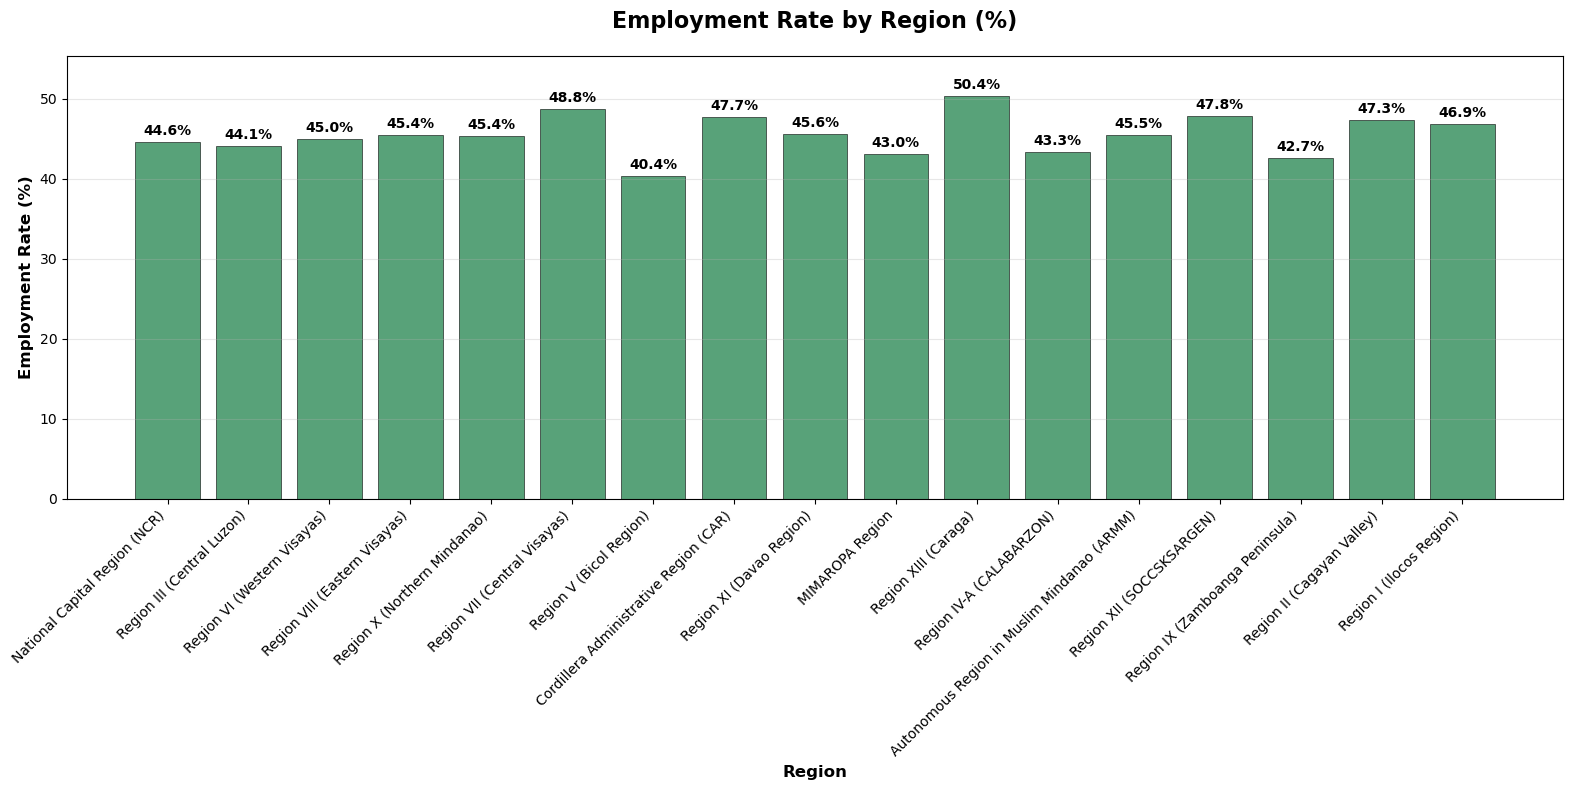

In [8]:
# Chart 2: Employment Rate by Region
plt.figure(figsize=(16, 8))
bars = plt.bar(range(len(employment_stats)), employment_stats['Employment_Rate'], 
               color='#2E8B57', alpha=0.8, edgecolor='black', linewidth=0.5)
plt.title('Employment Rate by Region (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Employment Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(range(len(employment_stats)), employment_stats.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.ylim(0, max(employment_stats['Employment_Rate']) + 5)
plt.tight_layout()
plt.show()

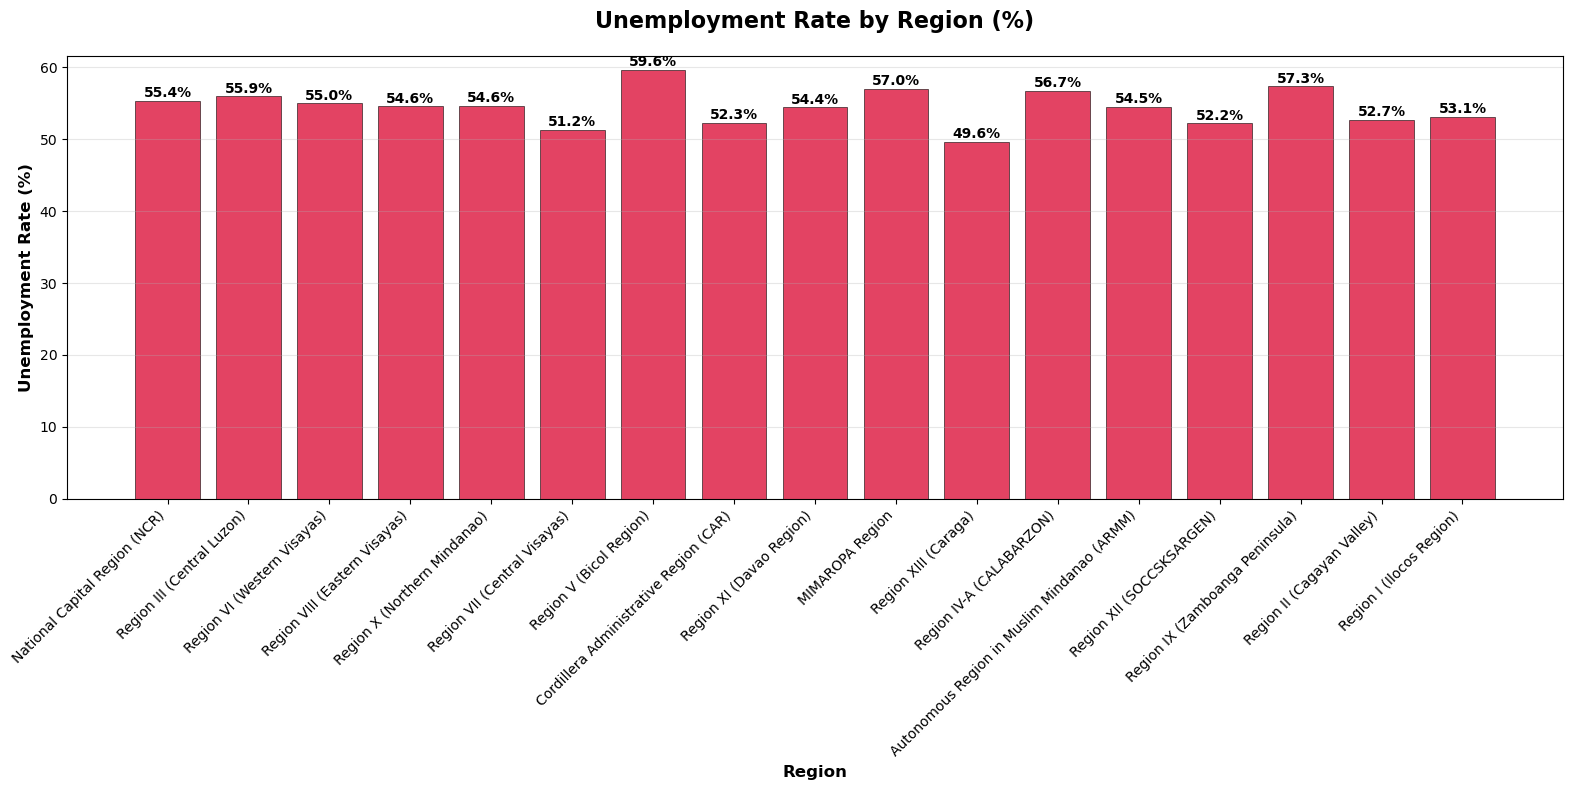

In [9]:
# Chart 3: Unemployment Rate by Region
plt.figure(figsize=(16, 8))
bars = plt.bar(range(len(employment_stats)), employment_stats['Unemployment_Rate'], 
               color='#DC143C', alpha=0.8, edgecolor='black', linewidth=0.5)
plt.title('Unemployment Rate by Region (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(range(len(employment_stats)), employment_stats.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.ylim(0, max(employment_stats['Unemployment_Rate']) + 2)
plt.tight_layout()
plt.show()

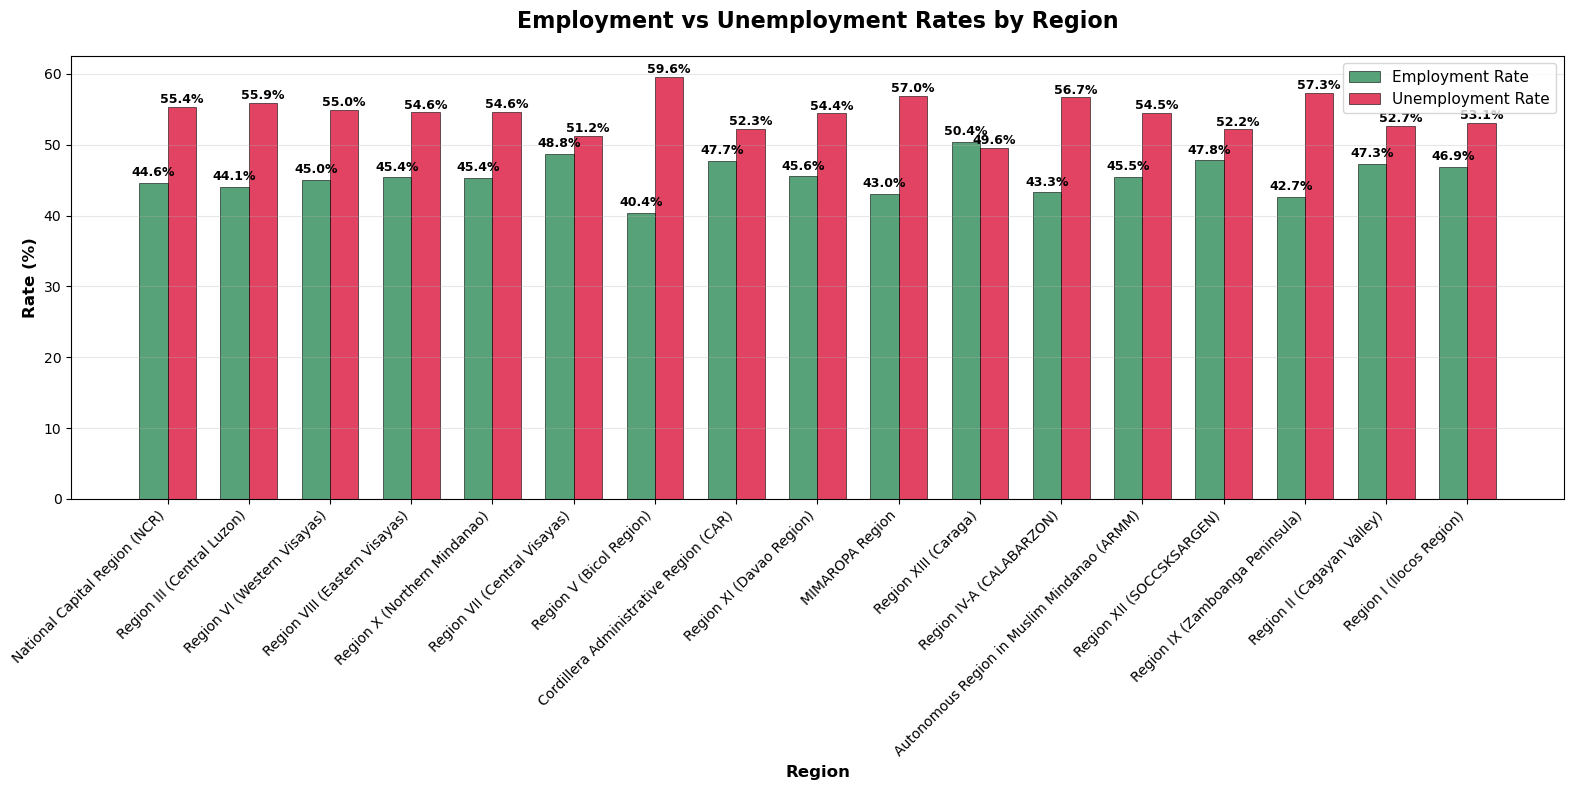

In [10]:
# Chart 4: Employment vs Unemployment Rates Comparison
plt.figure(figsize=(16, 8))
x_pos = np.arange(len(employment_stats))
width = 0.35

bars1 = plt.bar(x_pos - width/2, employment_stats['Employment_Rate'], width, 
                label='Employment Rate', color='#2E8B57', alpha=0.8, edgecolor='black', linewidth=0.5)
bars2 = plt.bar(x_pos + width/2, employment_stats['Unemployment_Rate'], width,
                label='Unemployment Rate', color='#DC143C', alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('Employment vs Unemployment Rates by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(x_pos, employment_stats.index, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

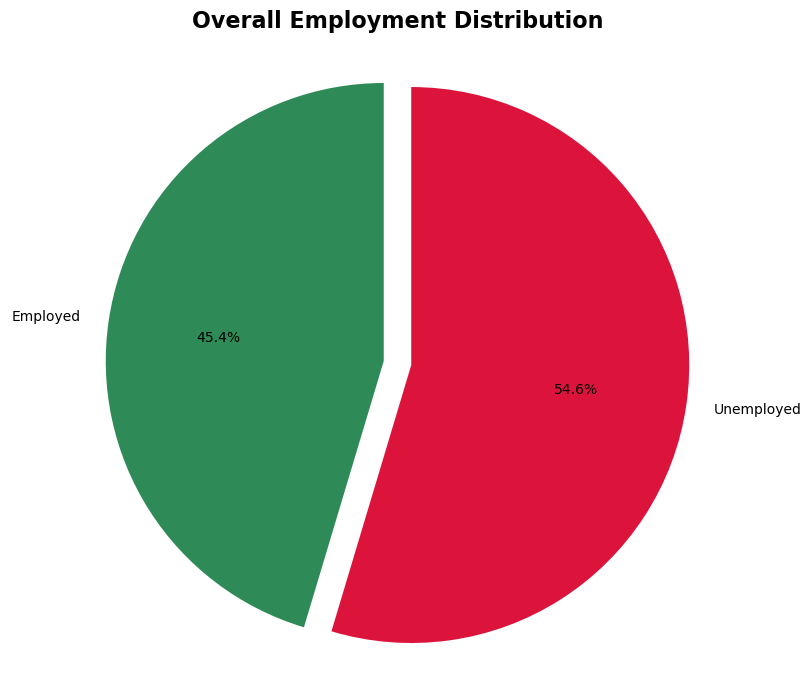

In [11]:
# Chart 5: Pie Chart - Overall Employment Distribution
plt.figure(figsize=(10, 8))
total_employed = employment_stats['Employed'].sum()
total_unemployed = employment_stats['Unemployed'].sum()

plt.pie([total_employed, total_unemployed], 
        labels=['Employed', 'Unemployed'],
        colors=['#2E8B57', '#DC143C'],
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0.05))
plt.title('Overall Employment Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()


In [12]:
# Print summary statistics
print("EMPLOYMENT STATISTICS BY REGION")
print("=" * 60)
print(f"{'Region':<45} {'Employed':<10} {'Unemployed':<12} {'Total':<10} {'Emp Rate':<10} {'Unemp Rate':<10}")
print("-" * 100)

for region, row in employment_stats.iterrows():
    print(f"{region:<45} {int(row['Employed']):<10,} {int(row['Unemployed']):<12,} {int(row['Total']):<10,} {row['Employment_Rate']:<10.1f}% {row['Unemployment_Rate']:<10.1f}%")

print("\nOVERALL STATISTICS:")
print(f"Total Employed: {employment_stats['Employed'].sum():,}")
print(f"Total Unemployed: {employment_stats['Unemployed'].sum():,}")
print(f"Total Population: {employment_stats['Total'].sum():,}")
print(f"Overall Employment Rate: {(employment_stats['Employed'].sum() / employment_stats['Total'].sum() * 100):.2f}%")
print(f"Overall Unemployment Rate: {(employment_stats['Unemployed'].sum() / employment_stats['Total'].sum() * 100):.2f}%")

EMPLOYMENT STATISTICS BY REGION
Region                                        Employed   Unemployed   Total      Emp Rate   Unemp Rate
----------------------------------------------------------------------------------------------------
National Capital Region (NCR)                 24,266     30,099       54,365     44.6      % 55.4      %
Region III (Central Luzon)                    14,263     18,101       32,364     44.1      % 55.9      %
Region VI (Western Visayas)                   11,756     14,353       26,109     45.0      % 55.0      %
Region VIII (Eastern Visayas)                 11,561     13,880       25,441     45.4      % 54.6      %
Region X (Northern Mindanao)                  10,668     12,851       23,519     45.4      % 54.6      %
Region VII (Central Visayas)                  11,317     11,899       23,216     48.8      % 51.2      %
Region V (Bicol Region)                       9,043      13,335       22,378     40.4      % 59.6      %
Cordillera Administrative Reg

In [13]:
industry_code_map = {
    # AGRICULTURE
    1: 'Agriculture and Forestry',
    2: 'Agriculture and Forestry',
    3: 'Fishing and Aquaculture',

    # INDUSTRY
    5: 'Mining and Quarrying',
    6: 'Mining and Quarrying',
    7: 'Mining and Quarrying',
    8: 'Mining and Quarrying',
    9: 'Mining and Quarrying',
    10: 'Manufacturing',  # 10–33
    11: 'Manufacturing',
    12: 'Manufacturing',
    # ... include 13 to 33 as 'Manufacturing'
    **{i: 'Manufacturing' for i in range(10, 34)},
    35: 'Electricity, Gas, Steam, and AC Supply',
    36: 'Water Supply, Sewerage, Waste Mgmt',
    37: 'Water Supply, Sewerage, Waste Mgmt',
    38: 'Water Supply, Sewerage, Waste Mgmt',
    39: 'Water Supply, Sewerage, Waste Mgmt',
    41: 'Construction',
    42: 'Construction',
    43: 'Construction',

    # SERVICES
    45: 'Wholesale & Retail Trade',
    46: 'Wholesale & Retail Trade',
    47: 'Wholesale & Retail Trade',
    49: 'Transportation and Storage',
    50: 'Transportation and Storage',
    51: 'Transportation and Storage',
    52: 'Transportation and Storage',
    53: 'Transportation and Storage',
    55: 'Accommodation and Food Services',
    56: 'Accommodation and Food Services',
    58: 'Information and Communication',
    59: 'Information and Communication',
    60: 'Information and Communication',
    61: 'Information and Communication',
    62: 'Information and Communication',
    63: 'Information and Communication',
    64: 'Financial and Insurance Activities',
    65: 'Financial and Insurance Activities',
    66: 'Financial and Insurance Activities',
    68: 'Real Estate Activities',
    69: 'Professional, Scientific & Technical',
    70: 'Professional, Scientific & Technical',
    71: 'Professional, Scientific & Technical',
    72: 'Professional, Scientific & Technical',
    73: 'Professional, Scientific & Technical',
    74: 'Professional, Scientific & Technical',
    75: 'Professional, Scientific & Technical',
    77: 'Admin & Support Services',
    78: 'Admin & Support Services',
    79: 'Admin & Support Services',
    80: 'Admin & Support Services',
    81: 'Admin & Support Services',
    82: 'Admin & Support Services',
    84: 'Public Administration & Defense',
    85: 'Education',
    86: 'Human Health & Social Work',
    87: 'Human Health & Social Work',
    88: 'Human Health & Social Work',
    90: 'Arts, Entertainment, Recreation',
    91: 'Arts, Entertainment, Recreation',
    92: 'Arts, Entertainment, Recreation',
    93: 'Arts, Entertainment, Recreation',
    94: 'Other Service Activities',
    95: 'Other Service Activities',
    96: 'Other Service Activities',
    97: 'Household Employment',
    98: 'Household Employment',
    99: 'Extraterritorial Organizations'
}


In [14]:
df

,Region,C10-Job Indicator,"C11 - Location of Work (Province, Municipality)",C15-Major Industry Group,C16-Nature of Employment (Primary Occupation),Region_Name,Employment_Status
0,1,1,2805,1,1,Region I (Ilocos Region),Employed
1,1,2,0,0,0,Region I (Ilocos Region),Unemployed
2,1,2,0,0,0,Region I (Ilocos Region),Unemployed
3,1,2,0,0,0,Region I (Ilocos Region),Unemployed
4,1,1,2805,1,1,Region I (Ilocos Region),Employed
...,...,...,...,...,...,...,...
394488,19,1,4712,47,0,Autonomous Region in Muslim Mindanao (ARMM),Employed
394489,19,2,0,0,0,Autonomous Region in Muslim Mindanao (ARMM),Unemployed
394490,19,2,0,0,0,Autonomous Region in Muslim Mindanao (ARMM),Unemployed
394491,19,2,0,0,0,Autonomous Region in Muslim Mindanao (ARMM),Unemployed


In [15]:
# Step 1: Apply industry code mapping
df['Industry'] = df['C15-Major Industry Group'].map(industry_code_map)

# Step 2: Filter for selected regions
target_regions = [
    'National Capital Region (NCR)',
    'Region III (Central Luzon)',
    'Region VI (Western Visayas)'
]
df_filtered = df[df['Region_Name'].isin(target_regions)]

# Step 3: Count occurrences
industry_counts = df_filtered.groupby(['Region_Name', 'Industry']).size().reset_index()
industry_counts.columns = ['Region', 'Industry', 'Count']

# Step 4: Get top 3 per region
top3_by_region = industry_counts.groupby('Region', group_keys=False).apply(
    lambda x: x.sort_values('Count', ascending=False).head(3)
).reset_index(drop=True)

# Step 5: Display result
print(top3_by_region)


                          Region                    Industry  Count
0  National Capital Region (NCR)    Wholesale & Retail Trade   5571
1  National Capital Region (NCR)    Admin & Support Services   3376
2  National Capital Region (NCR)  Transportation and Storage   2648
3     Region III (Central Luzon)    Wholesale & Retail Trade   3015
4     Region III (Central Luzon)                Construction   1838
5     Region III (Central Luzon)    Agriculture and Forestry   1570
6    Region VI (Western Visayas)    Agriculture and Forestry   2490
7    Region VI (Western Visayas)    Wholesale & Retail Trade   2486
8    Region VI (Western Visayas)                Construction   1079


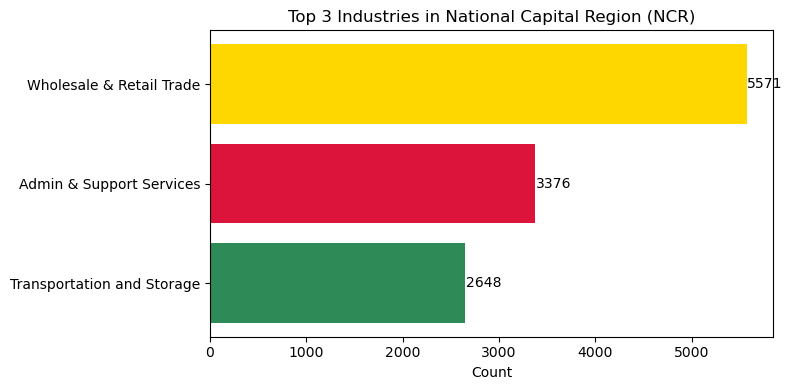

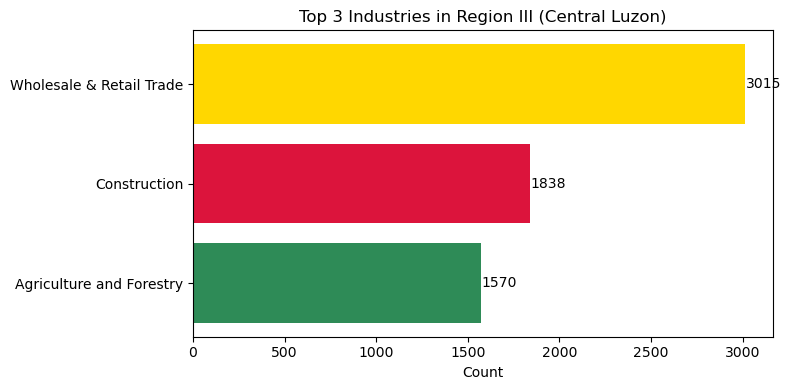

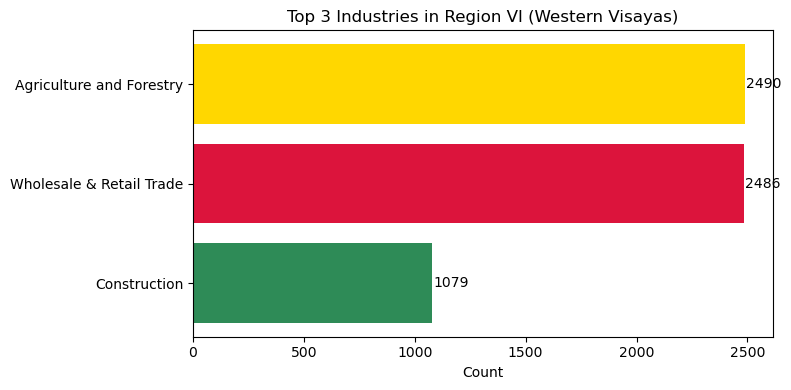

In [16]:
# Define custom color palette
custom_palette = ['#2E8B57', '#DC143C', '#FFD700']  # Add a third distinct color

# Unique regions from the top3 data
regions = top3_by_region['Region'].unique()

# Plot horizontal bar charts per region
for region in regions:
    data = top3_by_region[top3_by_region['Region'] == region].sort_values(by='Count')

    plt.figure(figsize=(8, 4))
    bars = plt.barh(
        data['Industry'],
        data['Count'],
        color=custom_palette[:len(data)]
    )

    # Add value labels to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
                 f'{int(width)}', va='center')

    plt.title(f'Top 3 Industries in {region}')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

In [20]:
df

,Region,C10-Job Indicator,"C11 - Location of Work (Province, Municipality)",C15-Major Industry Group,C16-Nature of Employment (Primary Occupation),Region_Name,Employment_Status,Industry
0,1,1,2805,1,1,Region I (Ilocos Region),Employed,Agriculture and Forestry
1,1,2,0,0,0,Region I (Ilocos Region),Unemployed,NaN
2,1,2,0,0,0,Region I (Ilocos Region),Unemployed,NaN
3,1,2,0,0,0,Region I (Ilocos Region),Unemployed,NaN
4,1,1,2805,1,1,Region I (Ilocos Region),Employed,Agriculture and Forestry
...,...,...,...,...,...,...,...,...
394488,19,1,4712,47,0,Autonomous Region in Muslim Mindanao (ARMM),Employed,Wholesale & Retail Trade
394489,19,2,0,0,0,Autonomous Region in Muslim Mindanao (ARMM),Unemployed,NaN
394490,19,2,0,0,0,Autonomous Region in Muslim Mindanao (ARMM),Unemployed,NaN
394491,19,2,0,0,0,Autonomous Region in Muslim Mindanao (ARMM),Unemployed,NaN


In [21]:
df['Industry'] = df['Industry'].fillna('NA')

In [22]:
df.isnull().sum()

Region                                             0
C10-Job Indicator                                  0
C11 - Location of Work (Province, Municipality)    0
C15-Major Industry Group                           0
C16-Nature of Employment (Primary Occupation)      0
Region_Name                                        0
Employment_Status                                  0
Industry                                           0
dtype: int64

In [23]:
df.to_csv("LFS_march2324_final_feature.csv", index=False)